# Analysis of COVID-19 Data

So we start off by querying the versions of packages used. Knowing this always helps when it comes to debugging certain problems.

In [1]:
import pandas as pd
print("Pandas Version = " + pd.__version__)
import numpy as np
print("Numpy Version = " + np.__version__)
import matplotlib
print("Matplotlib Version = " + matplotlib.__version__)
from IPython.display import display

# plotting essentials
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 10)
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.pyplot.style.use('tableau-colorblind10') # this is a necessity

Pandas Version = 1.0.3
Numpy Version = 1.18.4
Matplotlib Version = 3.2.1


Now the data is being fetched from the url provided by "Our World in Data", which you can learn more about by visiting this [link](https://github.com/owid/covid-19-data/tree/master/public/data). 

I thank the collaborators of "Our World in Data" for their awesome work of accumulating the COVID-19 testing rates for every country along with all other relevant information. The data is updated on a daily basis.

In [2]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
data["location"] = data["location"].apply(lambda x: x.title())
data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


Below is a utility function to print the dictionary of dataframes, which will be needed later in this code.

In [3]:
def print_dictionary(dictionary):
    for i in dictionary:
        print("\nRows for " + i + ":")
        display(dictionary[i])

At first let's have a look at the countries that the dataset has information about.

In [4]:
countries_in_data = data["location"].unique()

display(list(countries_in_data))

['Aruba',
 'Afghanistan',
 'Angola',
 'Anguilla',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antigua And Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Bonaire Sint Eustatius And Saba',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas',
 'Bosnia And Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 "Cote D'Ivoire",
 'Cameroon',
 'Democratic Republic Of Congo',
 'Congo',
 'Colombia',
 'Comoros',
 'Cape Verde',
 'Costa Rica',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Western Sahara',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland Islands',
 'France',
 'Faeroe Islands',
 'Gabon',
 'United

The variable "country_to_analyze" can be modified to include countries of your choice in the analysis. I set "countries_to_analyze" to Bangladesh (Bangladesh is where I am from), United States and India as default. Please do not use "World" or "International" as corresponding data for the total tests done are not present in the dataset.

In [5]:
countries_to_analyze = ["bangladesh", "united states", "india"] 

countries_to_analyze = [country.title() for country in countries_to_analyze]

for country in countries_to_analyze:
    if(not(country in countries_in_data)):
        print(country + " not in data, dropping...")
        countries_to_analyze.remove(country)
        
print("Countries being analyzed: ")
display(countries_to_analyze)

Countries being analyzed: 


['Bangladesh', 'United States', 'India']

A dictionary of dataframes corresponding to each country specified in "countries_to_analyze" is made and the indexes of any dataframe is changed to the calendar date of each row of that dataframe. 

In [6]:
dataframe_dictionary = {country: data[data["location"] == country]\
                        [["date", "total_deaths", "total_tests", "total_cases"]]\
                        for country in countries_to_analyze}

for country in dataframe_dictionary:
    dataframe_dictionary[country]["date"] = pd.to_datetime(dataframe_dictionary[country]["date"])
    dataframe_dictionary[country] = dataframe_dictionary[country].set_index("date")

print_dictionary(dataframe_dictionary)


Rows for Bangladesh:


,total_deaths,total_tests,total_cases
date,,,
2020-03-04,0,108.0,0
2020-03-05,0,111.0,0
2020-03-06,0,NaN,0
2020-03-07,0,120.0,0
2020-03-08,0,127.0,0
...,...,...,...
2020-05-17,314,175408.0,20995
2020-05-18,328,185196.0,22268
2020-05-19,349,193645.0,23870



Rows for United States:


,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0,NaN,0
2020-01-01,0,NaN,0
2020-01-02,0,NaN,0
2020-01-03,0,NaN,0
2020-01-04,0,NaN,0
...,...,...,...
2020-05-17,88754,11496488.0,1467884
2020-05-18,89562,11834508.0,1486757
2020-05-19,90353,12233987.0,1508598



Rows for India:


,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0,NaN,0
2020-01-01,0,NaN,0
2020-01-02,0,NaN,0
2020-01-03,0,NaN,0
2020-01-04,0,NaN,0
...,...,...,...
2020-05-17,2872,2227642.0,90927
2020-05-18,3029,2302792.0,96169
2020-05-19,3163,2404267.0,101139


Two new columns in each dataframe is create, one containing total deaths due to COVID-19 as a percentage of total tests, and the other containing total cases of COVID-19 as a percentage of total tests carried out. 

This step, however, may overestimate or underestimate the COVID-19 situation just like any other statistical metric, such as the Case Fatality Rate (CFR). You may visit this [link](https://ourworldindata.org/covid-mortality-risk) to read more about relevant statistical metrics and their pros and cons. 

If you do read the article, you will come across the line "<em>...the total number of cases of COVID-19 is not known. That’s partly because not everyone with COVID-19 is tested</em>". <b>This, in fact, is the motivation behind generating the plots in this notebook</b>.

In [7]:
for country in dataframe_dictionary:
    dataframe_dictionary[country]["deaths_as_percentage_of_tests"] = \
    (dataframe_dictionary[country]["total_deaths"] / dataframe_dictionary[country]["total_tests"]) * 100
    
    dataframe_dictionary[country]["cases_as_percentage_of_tests"] = \
    (dataframe_dictionary[country]["total_cases"] / dataframe_dictionary[country]["total_tests"]) * 100
    
print_dictionary(dataframe_dictionary)


Rows for Bangladesh:


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2020-03-04,0,108.0,0,0.000000,0.000000
2020-03-05,0,111.0,0,0.000000,0.000000
2020-03-06,0,NaN,0,NaN,NaN
2020-03-07,0,120.0,0,0.000000,0.000000
2020-03-08,0,127.0,0,0.000000,0.000000
...,...,...,...,...,...
2020-05-17,314,175408.0,20995,0.179011,11.969237
2020-05-18,328,185196.0,22268,0.177110,12.024018
2020-05-19,349,193645.0,23870,0.180227,12.326680



Rows for United States:


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2019-12-31,0,NaN,0,NaN,NaN
2020-01-01,0,NaN,0,NaN,NaN
2020-01-02,0,NaN,0,NaN,NaN
2020-01-03,0,NaN,0,NaN,NaN
2020-01-04,0,NaN,0,NaN,NaN
...,...,...,...,...,...
2020-05-17,88754,11496488.0,1467884,0.772010,12.768108
2020-05-18,89562,11834508.0,1486757,0.756787,12.562897
2020-05-19,90353,12233987.0,1508598,0.738541,12.331205



Rows for India:


,total_deaths,total_tests,total_cases,deaths_as_percentage_of_tests,cases_as_percentage_of_tests
date,,,,,
2019-12-31,0,NaN,0,NaN,NaN
2020-01-01,0,NaN,0,NaN,NaN
2020-01-02,0,NaN,0,NaN,NaN
2020-01-03,0,NaN,0,NaN,NaN
2020-01-04,0,NaN,0,NaN,NaN
...,...,...,...,...,...
2020-05-17,2872,2227642.0,90927,0.128926,4.081760
2020-05-18,3029,2302792.0,96169,0.131536,4.176191
2020-05-19,3163,2404267.0,101139,0.131558,4.206646


An outer join of columns containing the calculated percentages related to total deaths for the countries of interest is done and each column is renamed after the country it corresponds to. 

The outer join will create "NaN" values as some countries do not have data on certain dates, and there will also be "Inf" values present due to situations like "division by zero". Instead of keeping them blank, they have been filled with zeros, as technically, the entries with "infinite" or "not a number" values are the entries when no cases or deaths have been reported in the data.

In [8]:
data_plot_deaths = pd.concat([v["deaths_as_percentage_of_tests"]\
                              .rename(k)\
                              for k, v in dataframe_dictionary.items()], axis=1)

data_plot_deaths = data_plot_deaths.replace(np.inf, 0)
data_plot_deaths = data_plot_deaths.replace(np.nan, 0)

data_plot_deaths

,Bangladesh,United States,India
date,,,
2019-12-31,0.000000,0.000000,0.000000
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,0.000000,0.000000,0.000000
2020-01-03,0.000000,0.000000,0.000000
2020-01-04,0.000000,0.000000,0.000000
...,...,...,...
2020-05-17,0.179011,0.772010,0.128926
2020-05-18,0.177110,0.756787,0.131536
2020-05-19,0.180227,0.738541,0.131558


Operations similar to the ones done in the previous cell is done for the calculated percentages related to total cases.

In [9]:
data_plot_cases = pd.concat([v["cases_as_percentage_of_tests"]\
                              .rename(k)\
                              for k, v in dataframe_dictionary.items()], axis=1)

data_plot_cases = data_plot_cases.replace(np.inf, 0)
data_plot_cases = data_plot_cases.replace(np.nan, 0)

data_plot_cases

,Bangladesh,United States,India
date,,,
2019-12-31,0.000000,0.000000,0.000000
2020-01-01,0.000000,0.000000,0.000000
2020-01-02,0.000000,0.000000,0.000000
2020-01-03,0.000000,0.000000,0.000000
2020-01-04,0.000000,0.000000,0.000000
...,...,...,...
2020-05-17,11.969237,12.768108,4.081760
2020-05-18,12.024018,12.562897,4.176191
2020-05-19,12.326680,12.331205,4.206646


The line plots for the data processed till now appears to be "spiky", and to make the lines smoother, I considered using Exponentially Weighted Averages (EWA) over the number of days in the processed data (which is the number of entries in the processed data). EWA makes sure the line plots are smooth without losing the sharp changes in the values.

In [10]:
data_plot_deaths_smooth = data_plot_deaths.ewm(com=(1 - (1/data_plot_deaths.shape[0]))).mean()
data_plot_cases_smooth = data_plot_cases.ewm(com=(1 - (1/data_plot_cases.shape[0]))).mean()

Ladies and gentlemen, here I present to you, the most eagerly anticipated plots of the year!
Just kidding!

Text(0, 0.5, 'Percentage (%)')

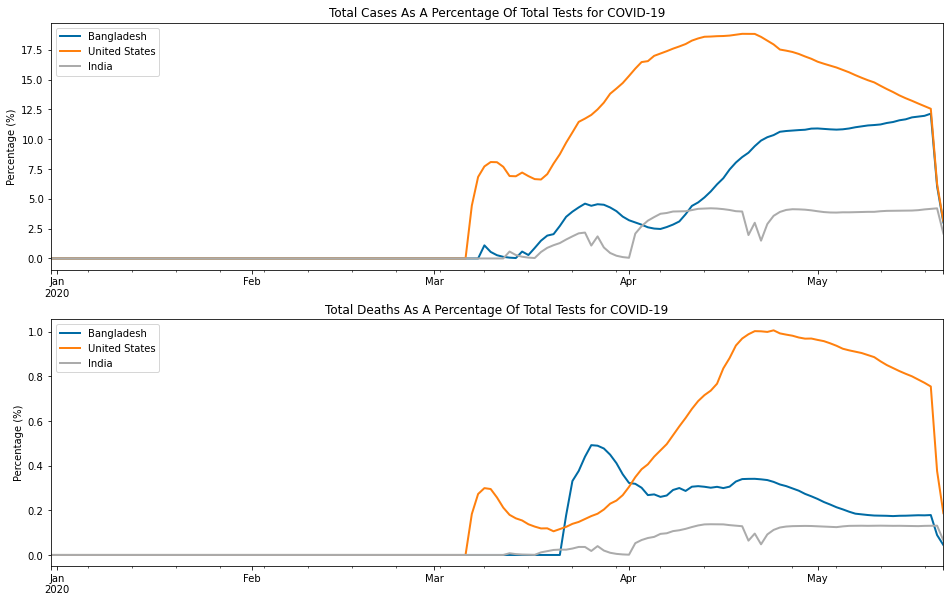

In [11]:
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=1)

ax1 = data_plot_cases_smooth.plot(ax = axes[0], title = "Total Cases As A Percentage Of Total Tests for COVID-19")
ax1.set_xlabel("")
ax1.set_ylabel("Percentage (%)")
ax2 = data_plot_deaths_smooth.plot(ax = axes[1], title = "Total Deaths As A Percentage Of Total Tests for COVID-19")
ax2.set_xlabel("")
ax2.set_ylabel("Percentage (%)")

If you want to save the plots, uncomment the lines below and re-run the notebook.

In [12]:
fig.savefig("covid-analysis.png", dpi=300)